In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [21]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [23]:
from lib.pyinterpolate.kriging.semivariance import calculate_semivariance

In [39]:
signal = np.fromfile('datasets/aami3a.dat', dtype=float)[:720]
signal = (signal / np.max(signal))
time_array = np.arange(start=0, stop=1, step=1/len(signal))

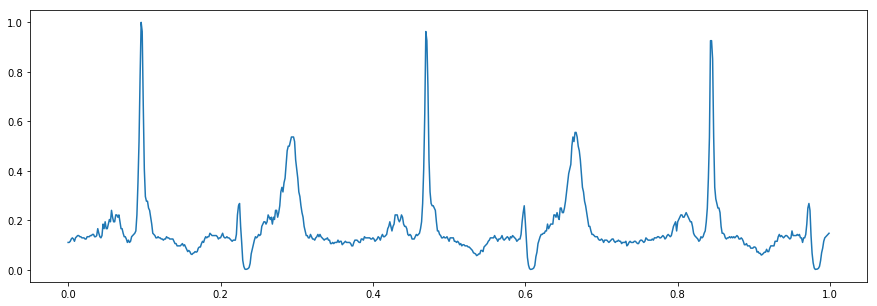

In [40]:
plt.figure(figsize=(15,5))
plt.plot(time_array, signal)

In [41]:
def remove_random_points(signal, probability=0.2):
    for idx, s in enumerate(signal):
        random_check = np.random.rand()
        if probability > random_check:
            signal[idx] = -999
    return signal
        
signal_with_holes = remove_random_points(signal)

In [42]:
number_of_nans = abs(signal_with_holes[signal_with_holes == -999].sum()) / 999
print('Number of -999: {}. Percent of -999: {}'.format(
    number_of_nans, number_of_nans / len(signal_with_holes)
))

Number of -999: 159.0. Percent of -999: 0.22083333333333333


In [43]:
# Data preparation: only existing values and their distances

known_signal = np.array([time_array, signal_with_holes]).T


In [44]:
known_signal = known_signal[np.all(known_signal >= 0, axis=1)]

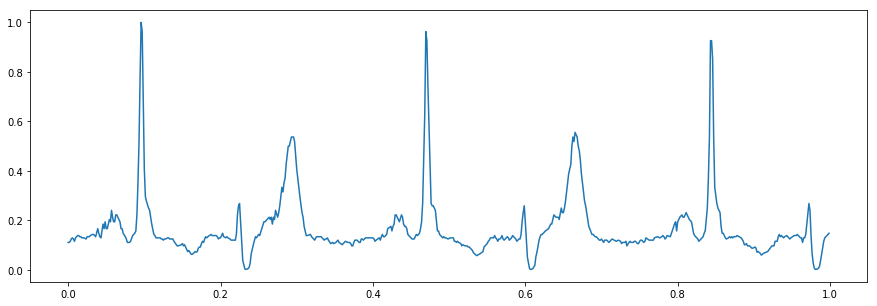

In [45]:
plt.figure(figsize=(15,5))
plt.plot(known_signal[:, 0], known_signal[:, 1])

In [46]:
bins = 0.01
ar_lags = np.arange(0, 1, 0.001)

smv = calculate_semivariance(known_signal, ar_lags, bins)

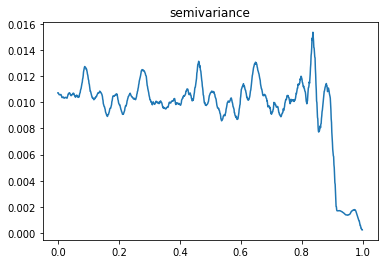

In [47]:
plt.figure()
plt.plot(smv[0], smv[1])
plt.title('semivariance')
plt.show()